# Umbralización Simple

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

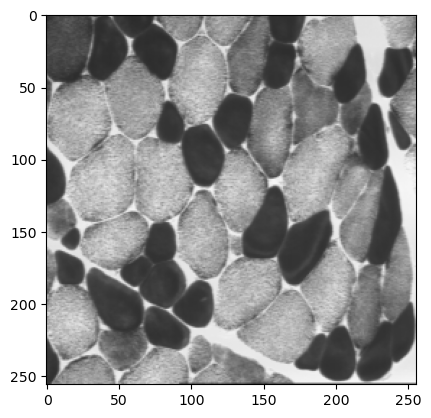

In [2]:
muscleImg = cv2.imread("img_lab2/MUSCLE.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(muscleImg, cmap="gray", vmin=0, vmax=255)

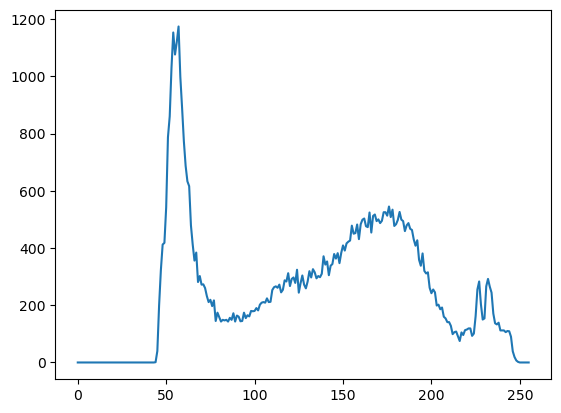

In [3]:
hist = cv2.calcHist([muscleImg], [0], None, [256], [0, 256])
plt.plot(hist)

El valor S que se escogerá es 85 puesto que parece que logra agrupar todos los valores oscuros de las células.

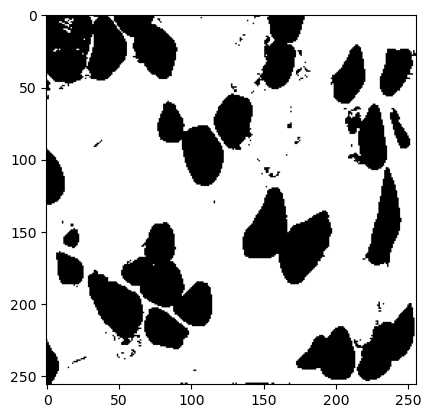

In [4]:
rescaled = exposure.rescale_intensity(muscleImg, in_range=(85, 86), out_range=(0, 255)).astype(np.uint8)
plt.imshow(rescaled, cmap='gray', vmin=0, vmax=255)

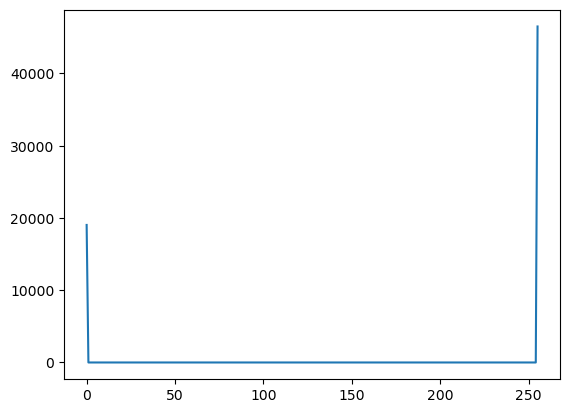

In [6]:
hist = cv2.calcHist([rescaled], [0], None, [256], [0, 256])
plt.plot(hist)

Lo que se puede observar es que al realizar esta calibración estamos llevando todos los valores inferiores a 85 a 0 mientras tomamos los valores superiores al 86 y los subimos al blanco total 255. Esto nos deja una imágen binaria que muestra claramente las manchas negras que queríamos filtrar.

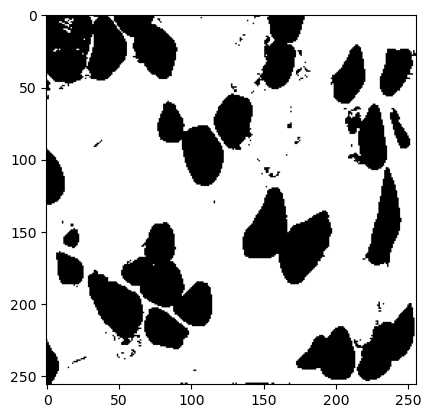

In [5]:
thres_val, thres_image = cv2.threshold(muscleImg, 85, 255, cv2.THRESH_BINARY)
plt.imshow(thres_image, cmap='gray', vmin=0, vmax=255)

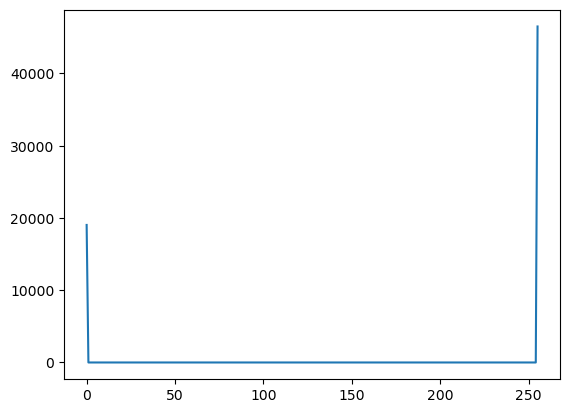

In [7]:
hist = cv2.calcHist([thres_image], [0], None, [256], [0, 256])
plt.plot(hist)

Lo que podemos ver es que el resultado fue el mismo, que al hacer la expansión del histograma a partir del valor S, todos los valores inferiores o iguales a 85 fueron a 0 mientras que los superiores fueron a 255.

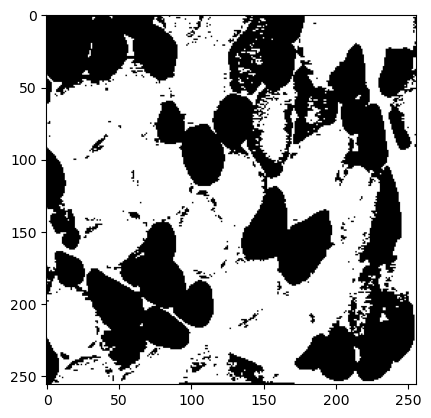

In [8]:
thres_value, thres_image = cv2.threshold(muscleImg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres_image, cmap='gray', vmin=0, vmax=255)

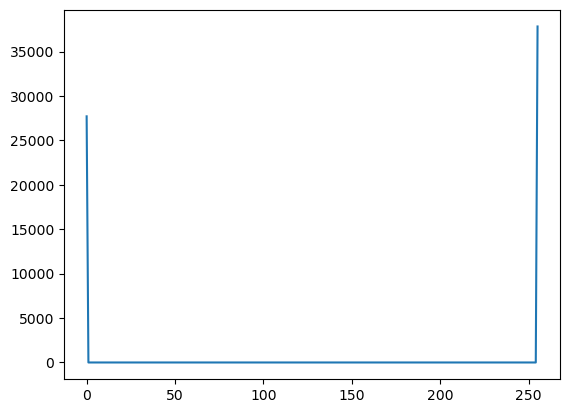

In [10]:
hist = cv2.calcHist([thres_image], [0], None, [256], [0, 256])
plt.plot(hist)

In [9]:
thres_value

125.0

Lo que podemos ver luego de realizar la umbralización automática (Otsu) es que la imágen filtrada a pesar de que fue calculada automáticamente no fue filtrada de forma tan precisa como cuando se hizo manualmente. Personalmente considero que el valor 125 fue muy alto y generó que entraran celulas no deseadas en el filtrado, sin embargo solo un experto podría detrminar si el filtrado fue correcto o no